<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _______</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


# Ayudantía
## 1.1 Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
## 1.2 Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


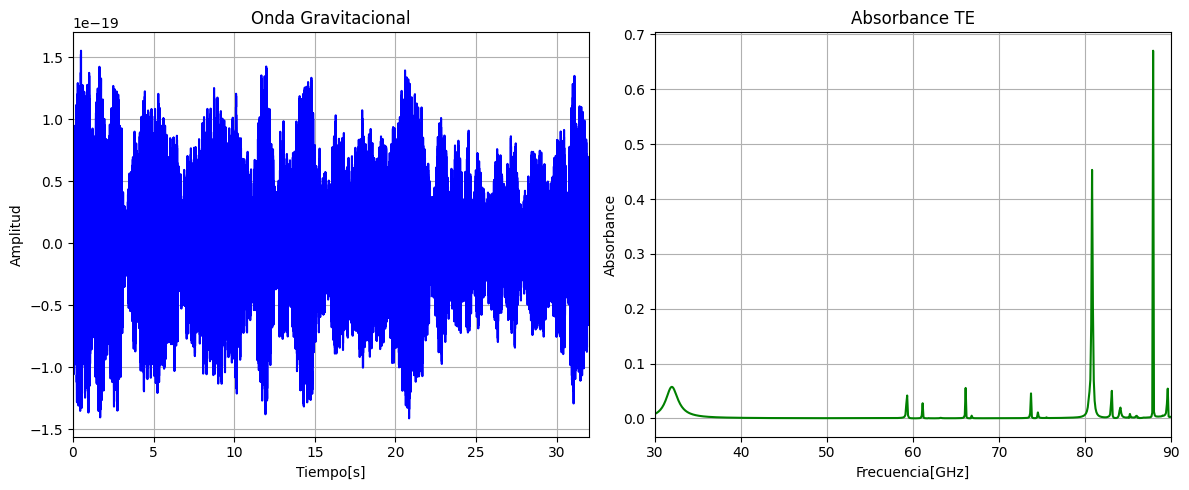

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargamos los archivo TXT y CSV
archivoTXT = "H-H1_GWOSC_16KHZ_R1-1268431079-32.txt"
txt = pd.read_csv(archivoTXT, comment='#', header=None)#Indicamos de ignorar las lineas que empiecen con # e indicamos que no exite titulo
archivoCSV = "AbsorbanceTE_0-0.csv"
CSV = pd.read_csv(archivoCSV)

#Calculo de tiempo en segundos
frecuenciaMuestreo = 16384 #Hz
tiempoTXT = txt.index/frecuenciaMuestreo

#Creamos el plot de los graficos
plt.figure(figsize=(12, 5))
#Ploteamos los datos obtenidos en el archivo TXT
plt.subplot(1, 2, 1)
plt.plot(tiempoTXT, txt[0], color='blue')
plt.title("Onda Gravitacional")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud")
plt.grid()
plt.xlim(tiempoTXT.min(), tiempoTXT.max())
#Subplot del CSV
plt.subplot(1, 2, 2)
plt.plot(CSV['Freq [GHz]'], CSV['AbsorbanceTE []'], color='green')
plt.title("Absorbance TE")
plt.xlabel("Frecuencia[GHz]")
plt.ylabel("Absorbance")
plt.grid()
plt.xlim(CSV['Freq [GHz]'].min(), CSV['Freq [GHz]'].max())

plt.tight_layout()
plt.show()




## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizarás para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


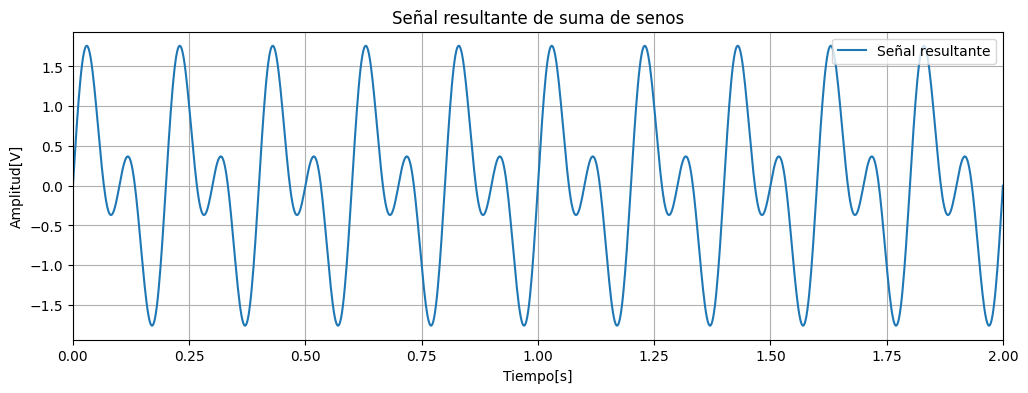

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Creación de señales

#Definimos las frecuencias
f1 = 5 #Hz
f2 = 10 #Hz
#Definimos el tiempo
t=np.linspace(0,2,1000)
#Escribimos las componentes de la suma
sen1 = np.sin(2* np.pi *f1*t)
sen2 = np.sin(2* np.pi *f2*t)
#Definimos la señal
sig = sen1 + sen2

#Ploteamos la señal resultante
plt.figure(figsize=(12, 4))
plt.plot(t, sig, label="Señal resultante")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.title("Señal resultante de suma de senos")
plt.legend(loc='upper right') #Tuve que mover el legend para que no quedara flotando en el centro del plot
plt.xlim(t[0], t[-1]) #Decidi eliminar el espacio sobrante
plt.grid()
plt.show()




## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

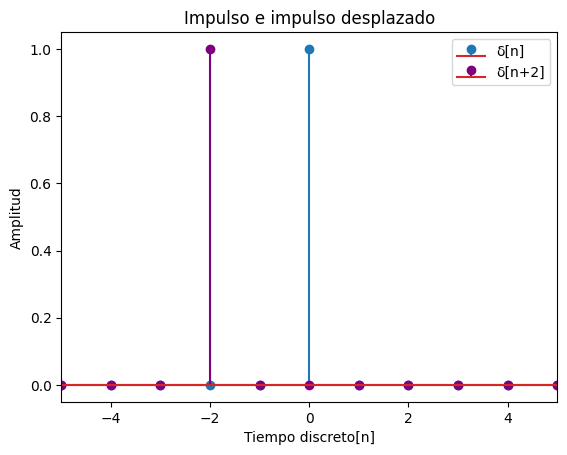

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

#Largo del grafico a mostrar, use un numero impar para poder tener la misma cantidad de puntos por lado
N = 11

# Desplazamiento: mover el impulso al índice 15 (por ejemplo)
imp = scipy.signal.unit_impulse(N, "mid")
impDesp = scipy.signal.unit_impulse(N, 3)

#Creamos el plot
#Definimos el eje x, usamos arange ya que es tiempo discreto
n = np.arange(-(N//2), N//2 + 1) #el +1 ayuda a que se forme la misma cantidad de puntos por lado
#Grafico, no coloque el comando grid ya que al ser impulsos se veia mejor de esta forma
plt.stem(n, imp, label='δ[n]')
plt.stem(n, impDesp, label='δ[n+2]', linefmt='purple')
plt.title("Impulso e impulso desplazado")
plt.xlabel("Tiempo discreto[n]")
plt.ylabel("Amplitud")
plt.legend()
plt.xlim(n[0], n[-1])
plt.show()


### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

(0.0, 1.9000000000000001)

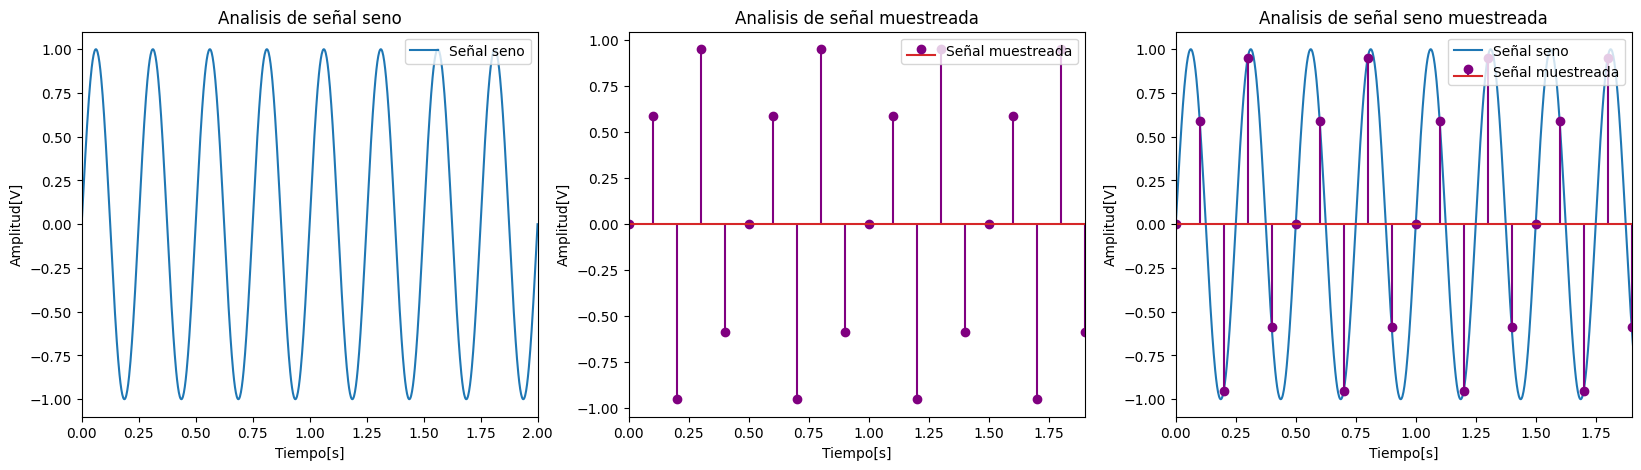

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos parametros de la señal
#La amplitud sera 1 para poder coincidir mejor con los impulsos de la señal
t = np.linspace(0, 2, 1000) #s
f = 4 #Hz
fs = 10 #Frecuencia de muestreo, por teorema de Nyquist usamos una frecuencia de muestreo mayor al doble de la frecuencia de la señal
Ts = 1/fs #El periodo es inversamente proporcional a la frecuencia por la formula T = 1/f
trenPulsos = np.arange(0, 2, Ts)#Creamos el de tren de pulsos en base al periodo de muestreo

#Señal seno original y muestreada respectivamente
seno = np.sin(2* np.pi *f*t)
senoSampleado = np.sin(2* np.pi *f*trenPulsos)

#Ploteo de señales
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.plot(t, seno, label = "Señal seno")
plt.legend(loc="upper right")
plt.title("Analisis de señal seno")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(t[0], t[-1])

plt.subplot(1, 3, 2)
plt.stem(trenPulsos, senoSampleado, "purple", label = "Señal muestreada" )
plt.legend(loc="upper right")
plt.title("Analisis de señal muestreada")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(trenPulsos[0], trenPulsos[-1])

plt.subplot(1, 3, 3)
plt.plot(t, seno, label = "Señal seno")
plt.stem(trenPulsos, senoSampleado, "purple", label = "Señal muestreada" )
plt.legend(loc="upper right")
plt.title("Analisis de señal seno muestreada")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(trenPulsos[0], trenPulsos[-1])

### 3.3 Genere una señal Triangular y realice la operación de sampleo

(0.0, 1.9666666666666666)

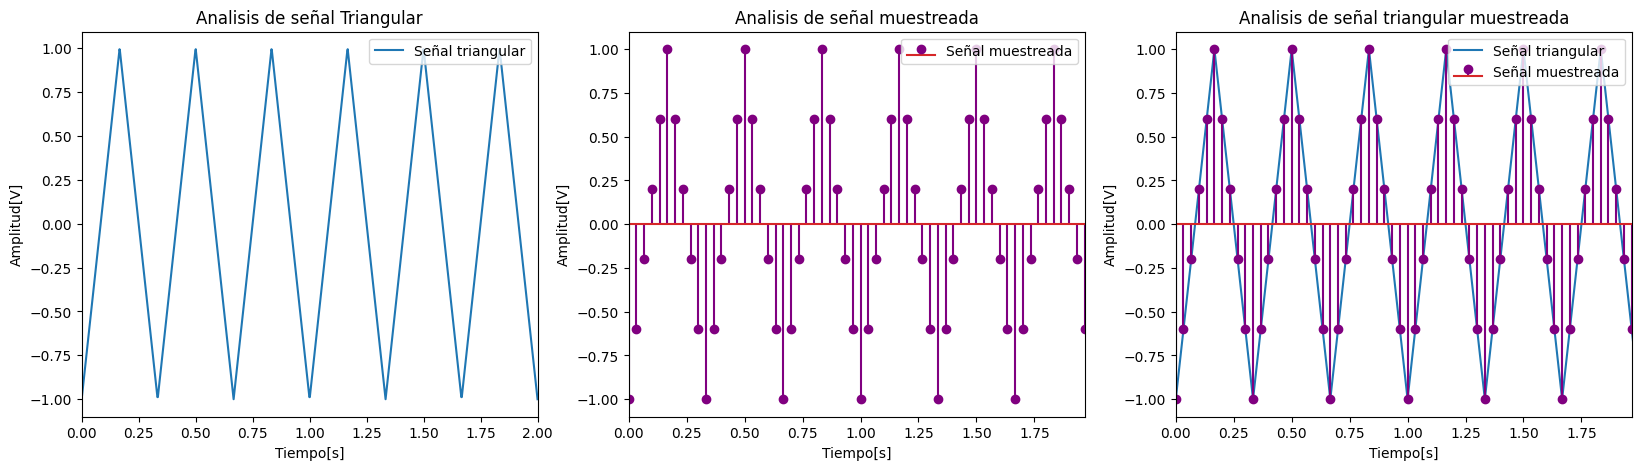

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Parametros de la señal
t = np.linspace(0, 2, 1000) #s
f = 3 #Hz
fs = 10*f
Ts = 1/fs
trenPulsos = np.arange(0, 2, Ts)#Creamos el de tren de pulsos en base al periodo de muestreo

#Creamos la señal triangular
tri = scipy.signal.sawtooth(2*np.pi*f*t, 0.5) #Width de 0.5 para que tenga forma triangular
triSampleada = scipy.signal.sawtooth(2*np.pi*f*trenPulsos, 0.5)


#Ploteo de señales
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.plot(t, tri, label = "Señal triangular")
plt.legend(loc="upper right")
plt.title("Analisis de señal Triangular")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(t[0], t[-1])

plt.subplot(1, 3, 2)
plt.stem(trenPulsos, triSampleada, "purple", label = "Señal muestreada" )
plt.legend(loc="upper right")
plt.title("Analisis de señal muestreada")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(trenPulsos[0], trenPulsos[-1])

plt.subplot(1, 3, 3)
plt.plot(t, tri, label = "Señal triangular")
plt.stem(trenPulsos, triSampleada, "purple", label = "Señal muestreada" )
plt.legend(loc="upper right")
plt.title("Analisis de señal triangular muestreada")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(trenPulsos[0], trenPulsos[-1])

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

(0.0, 1.99)

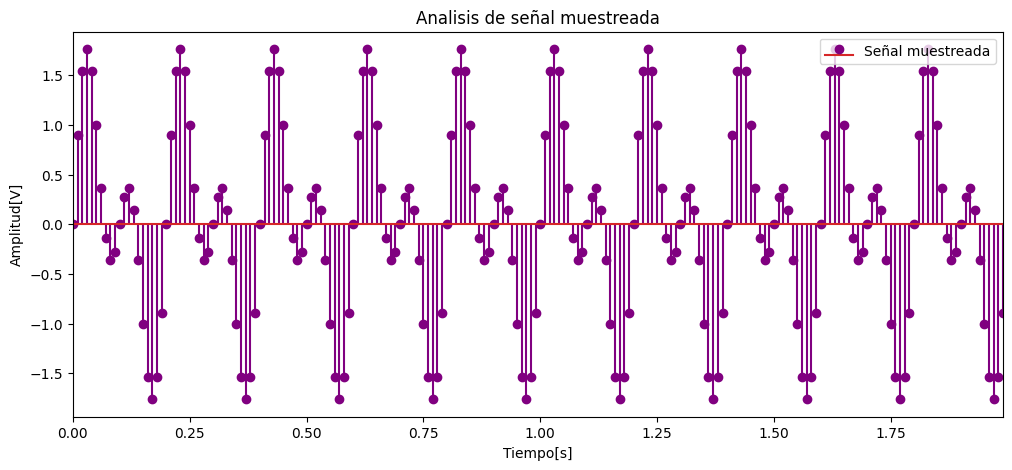

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos los datos de las señales muestreadas
f1 = 5 #Hz
f2 = 10 #Hz
fs = 100
Ts = 1/fs
trenPulsos = np.arange(0, 2, Ts)#Creamos el de tren de pulsos en base al periodo de muestreo

#Escribimos las componentes de la suma de senos muestreadas
senSamp1 = np.sin(2* np.pi *f1*trenPulsos)
senSamp2 = np.sin(2* np.pi *f2*trenPulsos)
#Definimos la suma de señales muestreadas
sig = senSamp1 + senSamp2


plt.figure(figsize=(12,5))
plt.stem(trenPulsos, sig, "purple", label = "Señal muestreada" )
plt.legend(loc="upper right")
plt.title("Analisis de señal muestreada")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(trenPulsos[0], trenPulsos[-1])



### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

Caso 1: La frecuencia de sampleo f es mayor que la frecuencia máxima de tu señal, Fmax.

(0.0, 1.9166666666666665)

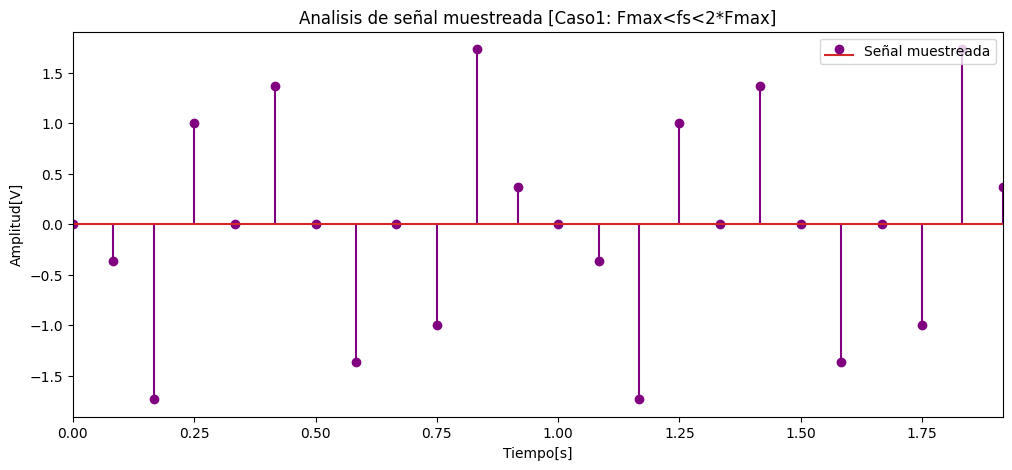

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Caso 1, señal muestreada mayor que frecuencia máxima
#Definimos los datos de las señales muestreadas
f1 = 5 #Hz
f2 = 10 #Hz f2 es la frecuencia más alta que tenemos por lo que sera la frecuencia máxima
fs = 12 #Ajustamos la frecuencia de muestreo a un valor entre f2 < fs < 2*fs
Ts = 1/fs
trenPulsos = np.arange(0, 2, Ts)#Creamos el de tren de pulsos en base al periodo de muestreo

#Escribimos las componentes de la suma de senos muestreadas
senSamp1 = np.sin(2* np.pi *f1*trenPulsos)
senSamp2 = np.sin(2* np.pi *f2*trenPulsos)
#Definimos la suma de señales muestreadas
sig = senSamp1 + senSamp2


plt.figure(figsize=(12,5))
plt.stem(trenPulsos, sig, "purple", label = "Señal muestreada" )
plt.legend(loc="upper right")
plt.title("Analisis de señal muestreada [Caso1: Fmax<fs<2*Fmax]")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(trenPulsos[0], trenPulsos[-1])

Caso 2: la frecuencia de sampleo f es mayor que 2*Fmax.

(0.0, 1.9545454545454546)

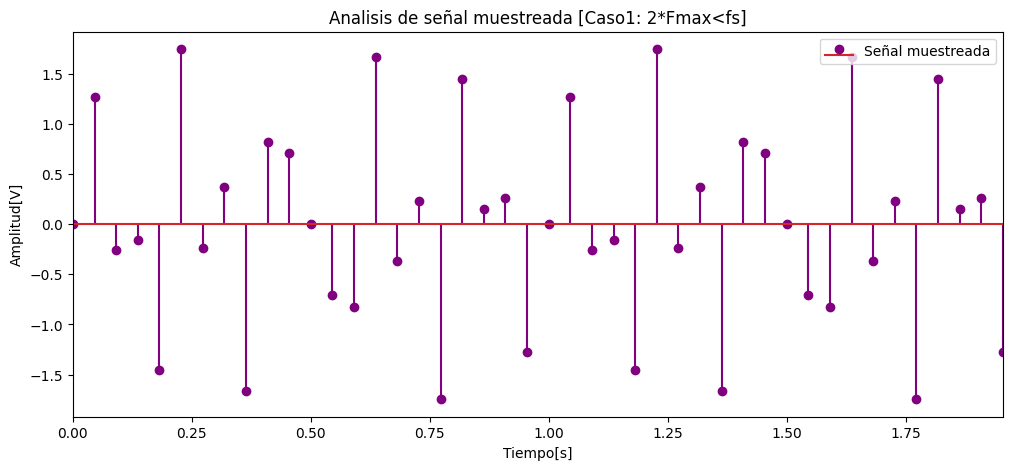

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Caso 2, señal muestreada mayor que 2 veces frecuencia máxima
#Definimos los datos de las señales muestreadas
f1 = 5 #Hz
f2 = 10 #Hz f2 es la frecuencia más alta que tenemos por lo que sera la frecuencia máxima
fs = 22 #Ajustamos la frecuencia de muestreo a un valor mayor que 5*Fmax
Ts = 1/fs
trenPulsos = np.arange(0, 2, Ts)#Creamos el de tren de pulsos en base al periodo de muestreo

#Escribimos las componentes de la suma de senos muestreadas
senSamp1 = np.sin(2* np.pi *f1*trenPulsos)
senSamp2 = np.sin(2* np.pi *f2*trenPulsos)
#Definimos la suma de señales muestreadas
sig = senSamp1 + senSamp2


plt.figure(figsize=(12,5))
plt.stem(trenPulsos, sig, "purple", label = "Señal muestreada" )
plt.legend(loc="upper right")
plt.title("Analisis de señal muestreada [Caso1: 2*Fmax<fs]")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(trenPulsos[0], trenPulsos[-1])

Caso 3: la frecuencia de sampleo f es mayor que 5*Fmax.

(0.0, 1.9833333333333334)

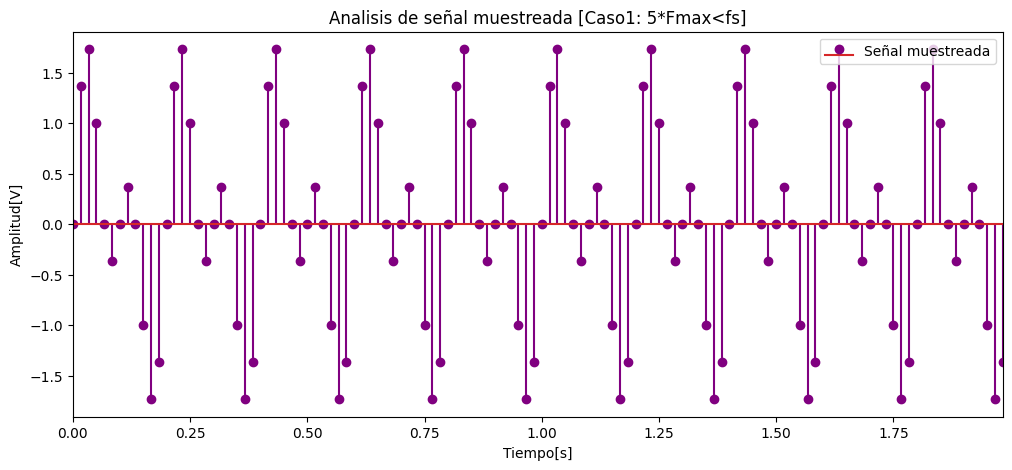

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Caso 3, señal muestreada mayor que 5 veces frecuencia máxima
#Definimos los datos de las señales muestreadas
f1 = 5 #Hz
f2 = 10 #Hz f2 es la frecuencia más alta que tenemos por lo que sera la frecuencia máxima
fs = 60 #Ajustamos la frecuencia de muestreo a un valor mayor que 5*Fmax
Ts = 1/fs
trenPulsos = np.arange(0, 2, Ts)#Creamos el de tren de pulsos en base al periodo de muestreo

#Escribimos las componentes de la suma de senos muestreadas
senSamp1 = np.sin(2* np.pi *f1*trenPulsos)
senSamp2 = np.sin(2* np.pi *f2*trenPulsos)
#Definimos la suma de señales muestreadas
sig = senSamp1 + senSamp2


plt.figure(figsize=(12,5))
plt.stem(trenPulsos, sig, "purple", label = "Señal muestreada" )
plt.legend(loc="upper right")
plt.title("Analisis de señal muestreada [Caso1: 5*Fmax<fs]")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.xlim(trenPulsos[0], trenPulsos[-1])

## 4. Análisis en el dominio de la frecuencia


### 4.1 Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


(-10.0, 10.0)

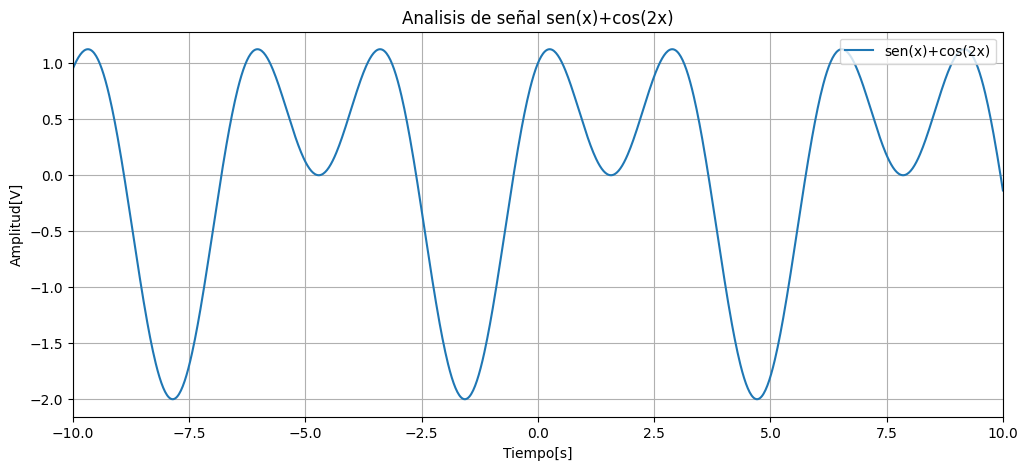

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos x
x = np.linspace(-10, 10, 1000)

#Señal pura
y = np.sin(x) + np.cos(2*x)

#Plot de la señal
plt.figure(figsize=(12,5))
plt.plot(x, y, label = "sen(x)+cos(2x)")
plt.legend(loc="upper right")
plt.title("Analisis de señal sen(x)+cos(2x)")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.grid()
plt.xlim(x[0], x[-1])

### 4.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

(-10.0, 10.0)

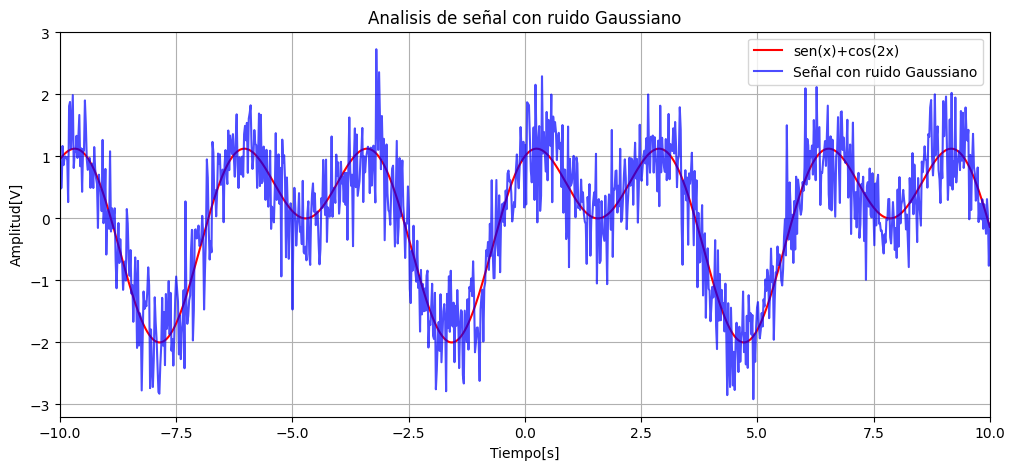

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Creamos el eje x
x = np.linspace(-10, 10, 1000)


#Creamos señal de ruido Gaussiano
ruido = np.random.normal(0, 0.5, t.shape)  #random.normal trabaja con distribución gaussiana, definimos media 0 con desviación 0.5
#.shape ajusta el tamaño de ruido para coincidir con la variable x

#Señal pura y con ruido Gaussiano
y = np.sin(x) + np.cos(2*x)
yGauss = y + ruido

plt.figure(figsize=(12,5))
plt.plot(x, y, color="red", label="sen(x)+cos(2x)")
plt.plot(x, yGauss, color="blue",alpha=0.7, label = "Señal con ruido Gaussiano") #Utilice alpha para ver la señal original más claramente bajando la visibilidad del ruido a un 70%
plt.legend(loc="upper right")
plt.title("Analisis de señal con ruido Gaussiano")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.grid()
plt.xlim(x[0], x[-1])



### 4.3 Obtenga la transformada de Fourier para las dos señales que generaste previamente


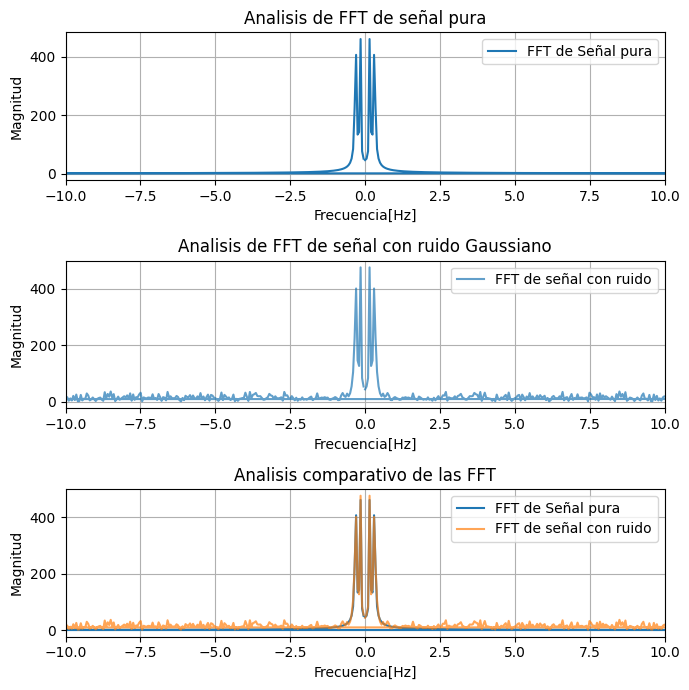

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#Creamos el eje x junto a la cantidad de elementos y el paso temporal
x = np.linspace(-10, 10, 1000)
N = len(x) #Calcula el largo de x
T = x[1] - x[0]  #Calcula el paso temporal, usando "(10-(-10))/(1000-1)"

#Creamos señal de ruido Gaussiano
ruido = np.random.normal(0, 0.5, x.shape)  #random.normal trabaja con distribución gaussiana, definimos media 0 con desviación 0.5
#.shape ajusta el tamaño de ruido para coincidir con la variable x
y = np.sin(x) + np.cos(2*x) #Señal pura
yGauss = y + ruido #Señal pura con ruido Gaussiano


#Calculo de las FFT
fftSenP = np.fft.fft(y) #Calculamos la FFT de la señal pura
frecuenciaFFT = np.fft.fftfreq(N, T) #Calculamos la FFT de las frecuencias, esto es importante para definir el mundo de las frecuencias en cuanto al eje de las abscisas
fftRuido = np.fft.fft(yGauss) #Calculamos la FFT de la señal con ruido

#Graficamos las señales
plt.figure(figsize=(7, 7))
plt.subplot(3, 1, 1)
plt.plot(frecuenciaFFT, np.abs(fftSenP), label='FFT de Señal pura')
plt.legend(loc="upper right")
plt.title("Analisis de FFT de señal pura")
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.xlim(x[0], x[-1])

plt.subplot(3, 1, 2)
plt.plot(frecuenciaFFT, np.abs(fftRuido), alpha=0.7,  label='FFT de señal con ruido')
plt.legend(loc="upper right")
plt.title("Analisis de FFT de señal con ruido Gaussiano")
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.xlim(x[0], x[-1])

plt.subplot(3, 1, 3)
plt.plot(frecuenciaFFT, np.abs(fftSenP), label='FFT de Señal pura')
plt.plot(frecuenciaFFT, np.abs(fftRuido), alpha=0.7,  label='FFT de señal con ruido')
plt.legend(loc="upper right")
plt.title("Analisis comparativo de las FFT")
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.xlim(x[0], x[-1])
plt.tight_layout()
plt.show()




### 4.4 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

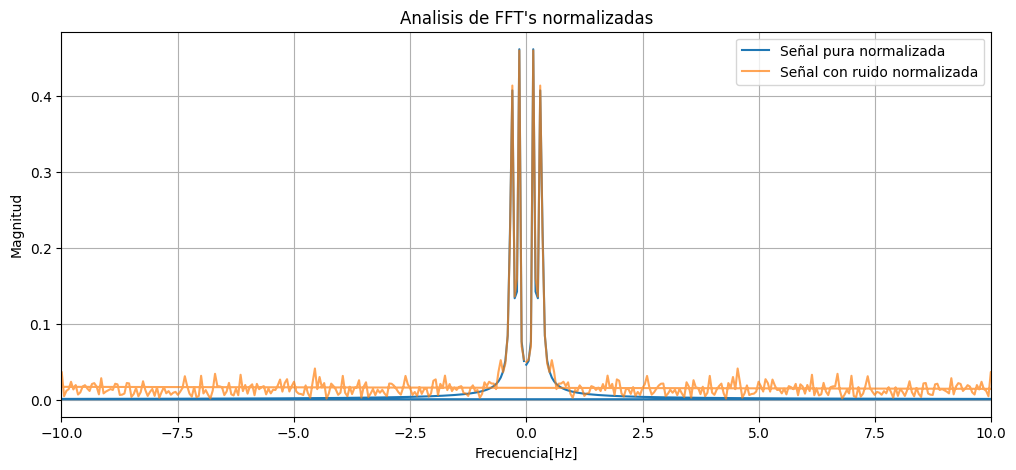

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#Creamos el eje x junto a la cantidad de elementos y el paso temporal
x = np.linspace(-10, 10, 1000)
N = len(x) #Calcula el largo de x
T = x[1] - x[0]  #Calcula el paso temporal, usando "(10-(-10))/(1000-1)"

#Creamos señal de ruido Gaussiano
ruido = np.random.normal(0, 0.5, x.shape)  #random.normal trabaja con distribución gaussiana, definimos media 0 con desviación 0.5
#.shape ajusta el tamaño de ruido para coincidir con la variable x
y = np.sin(x) + np.cos(2*x) #Señal pura
yGauss = y + ruido #Señal pura con ruido Gaussiano

#Calculo de las FFT
fftSenP = np.fft.fft(y) #Calculamos la FFT de la señal pura
frecuenciaFFT = np.fft.fftfreq(N, T) #Calculamos la FFT de las frecuencias, esto es importante para definir el mundo de las frecuencias en cuanto al eje de las abscisas
fftRuido = np.fft.fft(yGauss) #Calculamos la FFT de la señal con ruido

#Normalizamos las FFT's
fftNorm = np.abs(fftSenP)/N
fftRuidoNor = np.abs(fftRuido)/N

#Graficamos las señales
plt.figure(figsize=(12, 5))
plt.plot(frecuenciaFFT, fftNorm, label='Señal pura normalizada')
plt.plot(frecuenciaFFT, fftRuidoNor, alpha=0.7,  label='Señal con ruido normalizada')
plt.legend(loc="upper right")
plt.title("Analisis de FFT's normalizadas")
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.xlim(x[0], x[-1])
plt.show()




### 4.5 Encuentra la transformada inversa de Fourier
_Solo para una señal de las dos que generaste inicialmente_.

En este caso puede usar una librería.

Explica en detalle que hace la librería y el resultado que arroja.

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


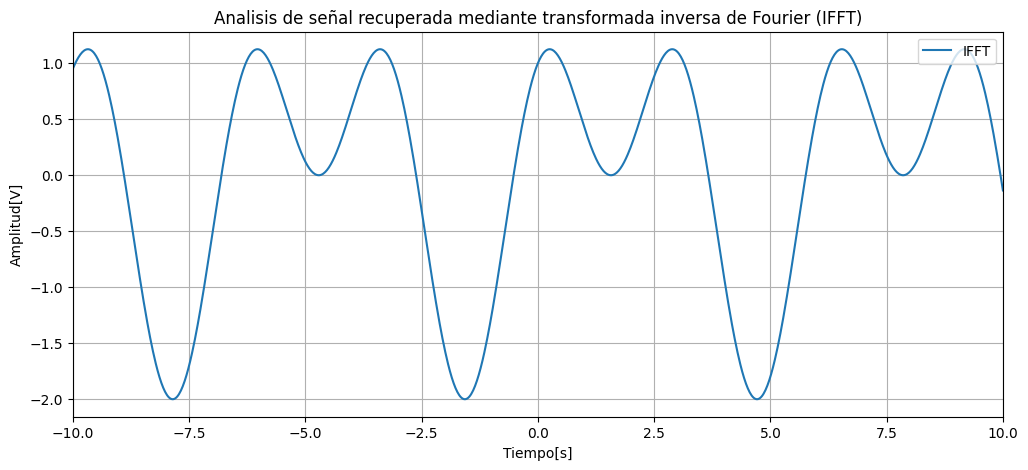

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#Creamos el eje x junto a la cantidad de elementos y el paso temporal
x = np.linspace(-10, 10, 1000)
N = len(x) #Calcula el largo de x
T = x[1] - x[0]  #Calcula el paso temporal, usando "(10-(-10))/(1000-1)"

#Creamos señal de ruido Gaussiano
ruido = np.random.normal(0, 0.5, x.shape)  #random.normal trabaja con distribución gaussiana, definimos media 0 con desviación 0.5
#.shape ajusta el tamaño de ruido para coincidir con la variable x
y = np.sin(x) + np.cos(2*x) #Señal pura
yGauss = y + ruido #Señal pura con ruido Gaussiano

#Calculo de las FFT
fftSenP = np.fft.fft(y) #Calculamos la FFT de la señal pura
IFFT = np.fft.ifft(fftSenP) #Calculamos la FFT inversa (IFFT)

#Graficamos la señal recuperada
plt.figure(figsize=(12, 5))
plt.plot(x, IFFT, label='IFFT')
plt.legend(loc="upper right")
plt.title("Analisis de señal recuperada mediante transformada inversa de Fourier (IFFT)")
plt.xlabel("Tiempo[s]")
plt.ylabel("Amplitud[V]")
plt.grid()
plt.xlim(x[0], x[-1])
plt.show()


# 5 Explica tus hallazgos (explicar basado en la teoría)
- Explica que comprobaste con relación al sampleo de señales.
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

In [11]:
#Durante el trabajo logre comprobar el teorema de nyquist, mediante el constante cambio de frecuencias de muestreo (Sampleo), pude observar
#los cambios de los graficos a medida que la frecuencia de muestreo aumentaba o disminuia en relación a la señal que estabamos observando.

#La transformada de fourier nos ayuda a interpretar los "peaks" de una señal a pesar del ruido que posee la señal, facilitando su analisis
#para posibles predicciones de comportamiento.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html